In [59]:
import pandas as pd
from datasets import load_dataset

In [114]:
data_path = "/home/vsb29/rds/hpc-work/project/data/data_file3.json"
data = load_dataset("json", data_files=data_path)
data

Found cached dataset json (/home/vsb29/.cache/huggingface/datasets/json/default-9c44e7b79e8e460a/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['output', 'input', 'instruction'],
        num_rows: 281
    })
})

In [115]:
d_df = data["train"].to_pandas()
d_df.head(1)

,output,input,instruction
0,no,### INPUT STORY: My name is Ronald Smith and I...,"Does the statement overemphasize, or show emot..."


In [116]:
d_df["output"].value_counts(normalize=False)

output
no     149
yes    132
Name: count, dtype: int64

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [101]:
from info import yesnoCR_turned
yesno = " Please answer only 'yes' or 'no'."
diff = " Make sure to think carefully about what is said in the input story VS what is said in the statement."
map_instr = {yesnoCR_turned[0]:"coherence", yesnoCR_turned[1]:"guilty plea", yesnoCR_turned[2]:"suffer", yesnoCR_turned[3]:"age", yesnoCR_turned[4]:"record", yesnoCR_turned[5]:"mental", yesnoCR_turned[6]:"explain offense", yesnoCR_turned[7]:"amends", yesnoCR_turned[8]:"improve / prevent", yesnoCR_turned[9]:"character", yesnoCR_turned[10]:"irrelevant", yesnoCR_turned[11]:"emotions", yesnoCR_turned[12]:"hallucination"}


In [102]:
for index, row in d_df.iterrows():
    cr = row['instruction'].split("?")[0]+"?"
    if cr == "Is anything in the statement badly phrased, difficult to follow or repetative?":
        row['instruction'] = 'coherence'
    elif cr in yesnoCR_turned:
        row['instruction'] = map_instr[cr]
    elif cr == "Does the statement give a different impression (compared to the input story) of whether the defendant has already suffered as a consequence of their crime?":
        row['instruction'] = "suffer"
    else:
        print(cr)


In [103]:
def yesno_tobroken(YN):
    if YN.lower()=='yes':
        return 'Broken'
    elif YN.lower()=='no':
        return 'Not broken'
    else:
        return 'wierd!:::'

d_df['output'] = d_df['output'].apply(yesno_tobroken)

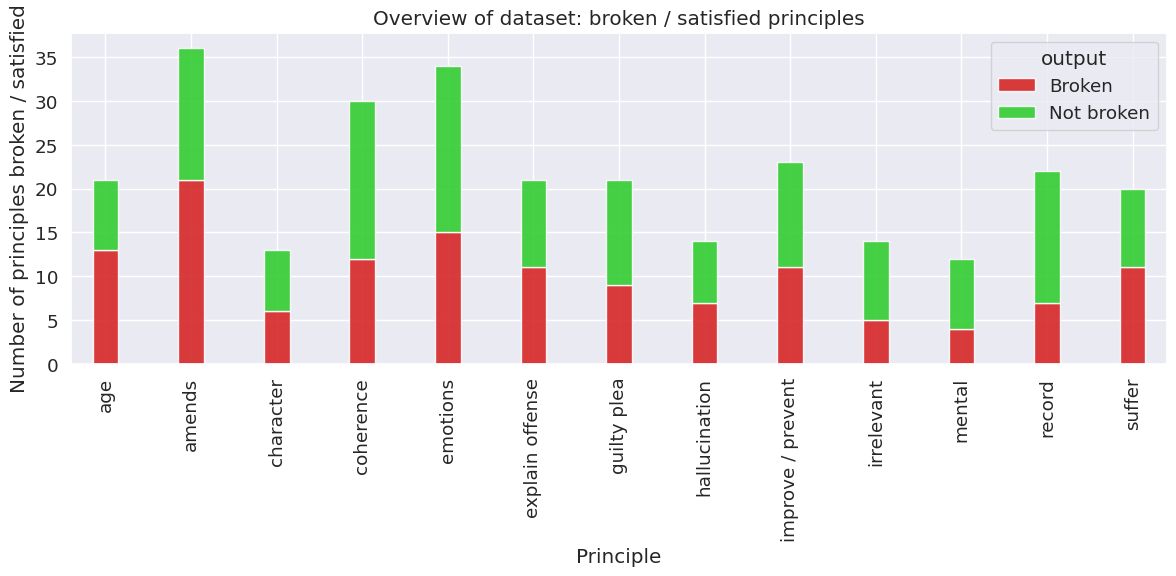

In [113]:
sns.set(font_scale=1.2)
gg = d_df.groupby("instruction")["output"].value_counts().unstack()
fig, ax = plt.subplots(figsize=(12,6))

gg.plot(kind='bar', stacked=True, ax=ax, width=0.3, alpha=0.9, color=['tab:red', 'limegreen', 'C3', 'y', 'C4'], xlabel='Principle', ylabel='Number of principles broken / satisfied', title='Overview of dataset: broken / satisfied principles')
#sns.countplot(data=d_df, x='instruction')
plt.tight_layout()
plt.savefig('data1.png', dpi=400)

<Figure size 640x480 with 0 Axes>